In [183]:
import glob 
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

dic = pd.read_csv("./Base de Dados/legenda.txt",delimiter=';', encoding='utf-8')

In [65]:
def arrumaDb(db,leg):
    listaNomesDb = []
    listaNomesLeg = []
    dic = {}
    listaCodFica= []
    for x in range(len(leg["codmunicípio"])):
        listaCodFica.append(leg["codmunicípio"][x])
    db = db.where((db["município"]).isin(listaCodFica)).dropna()
    db = db.drop(columns=['região','uf','subclasse','saldomovimentação','cbo2002ocupação','categoria','tipoestabelecimento','tipodedeficiência','indtrabintermitente','horascontratuais','tamestabjan','indicadoraprendiz','fonte','competência','indtrabparcial'])
    
    for name in leg.columns:
        listaNomesLeg.append(name)
    
    for name in db.columns:
        listaNomesDb.append(name)
    
    for k in range(0,len(leg.columns),2):
        dic = {}
        for i in range(len(leg)):
            if (leg.notna()[listaNomesLeg[k]][i]):
                dic[leg[listaNomesLeg[k]][i]]=leg[listaNomesLeg[k+1]][i]
        try:
            db[listaNomesLeg[k+1]]=db[listaNomesLeg[k+1]].map(dic)
        except:
            print(sys.exc_info()[0])
     
    return db

In [193]:
def pesquisaQuant(df,entrada,coluna):
    pesquisaFeita = ""
    kery = ""
    
    if(isinstance(coluna, list)):
        for q in range(len(coluna)):
            if(isinstance(entrada, list)):
                kery+= f'{coluna[q]}=="{entrada[q]}"'
            else:
                kery+= f'{coluna[q]}=="{entrada}"' 
            if (coluna[q]!=coluna[-1]):
                kery+=" and "
    else:
        if(isinstance(entrada, list)):
            for q in range(len(entrada)):
                kery+= f'{coluna}=="{entrada[q]}"'
                if (entrada[q]!=entrada[-1]):
                    kery+=" and "
        else:
            kery+= f'{coluna}=="{entrada}"' 

    quantidade = df.query(kery)[coluna].count()
    try:
        quantidade = quantidade[0]
    except:
        return quantidade
    return quantidade

In [243]:
def pesquisa(df,kery):
    quantidade = df.query(kery).count()
    try:
        quantidade = quantidade[0]
    except:
        return quantidade
    return quantidade

In [4]:
jan2020 = pd.read_csv("./Base de Dados/CAGEDMOV202001.txt",delimiter=';', encoding='utf-8')
jan2020 = arrumaDb(jan2020, dic)
print("jan2020 carregado")
fev2020 = pd.read_csv("./Base de Dados/CAGEDMOV202002.txt",delimiter=';', encoding='utf-8')
fev2020 = arrumaDb(fev2020, dic)
print("fev2020 carregado")
mar2020 = pd.read_csv("./Base de Dados/CAGEDMOV202003.txt",delimiter=';', encoding='utf-8')
mar2020 = arrumaDb(mar2020, dic)
print("mar2020 carregado")
abr2020 = pd.read_csv("./Base de Dados/CAGEDMOV202004.txt",delimiter=';', encoding='utf-8')
abr2020 = arrumaDb(abr2020, dic)
print("abr2020 carregado")
mai2020 = pd.read_csv("./Base de Dados/CAGEDMOV202005.txt",delimiter=';', encoding='utf-8')
mai2020 = arrumaDb(mai2020, dic)
print("mai2020 carregado")
jun2020 = pd.read_csv("./Base de Dados/CAGEDMOV202006.txt",delimiter=';', encoding='utf-8')
jun2020 = arrumaDb(jun2020, dic)
print("jun2020 carregado")
jul2020 = pd.read_csv("./Base de Dados/CAGEDMOV202007.txt",delimiter=';', encoding='utf-8')
jul2020 = arrumaDb(jul2020, dic)
print("jul2020 carregado")
ago2020 = pd.read_csv("./Base de Dados/CAGEDMOV202008.txt",delimiter=';', encoding='utf-8')
ago2020 = arrumaDb(ago2020, dic)
print("ago2020 carregado")
set2020 = pd.read_csv("./Base de Dados/CAGEDMOV202009.txt",delimiter=';', encoding='utf-8')
set2020 = arrumaDb(set2020, dic)
print("set2020 carregado")
out2020 = pd.read_csv("./Base de Dados/CAGEDMOV202010.txt",delimiter=';', encoding='utf-8')
out2020 = arrumaDb(out2020, dic)
print("out2020 carregado")
nov2020 = pd.read_csv("./Base de Dados/CAGEDMOV202011.txt",delimiter=';', encoding='utf-8')
nov2020 = arrumaDb(nov2020, dic)
print("nov2020 carregado")
dez2020 = pd.read_csv("./Base de Dados/CAGEDMOV202012.txt",delimiter=';', encoding='utf-8')
dez2020 = arrumaDb(dez2020, dic)
print("dez2020 carregado")
jan2021 = pd.read_csv("./Base de Dados/CAGEDMOV202101.txt",delimiter=';', encoding='utf-8')
jan2021 = arrumaDb(jan2021, dic)
print("jan2021 carregado")
fev2021 = pd.read_csv("./Base de Dados/CAGEDMOV202102.txt",delimiter=';', encoding='utf-8')
fev2021 = arrumaDb(fev2021, dic)
print("fev2021 carregado")
mar2021 = pd.read_csv("./Base de Dados/CAGEDMOV202103.txt",delimiter=';', encoding='utf-8')
mar2021 = arrumaDb(mar2021, dic)
print("mar2021 carregado")
abr2021 = pd.read_csv("./Base de Dados/CAGEDMOV202104.txt",delimiter=';', encoding='utf-8')
abr2021 = arrumaDb(abr2021, dic)
print("abr2021 carregado")

jan2020 carregado
fev2020 carregado
mar2020 carregado
abr2020 carregado
mai2020 carregado
jun2020 carregado
jul2020 carregado
ago2020 carregado
set2020 carregado
out2020 carregado
nov2020 carregado
dez2020 carregado
jan2021 carregado
fev2021 carregado
mar2021 carregado
abr2021 carregado


In [194]:
mesesDF = [jan2020,fev2020,mar2020,abr2020,mai2020,jun2020,jul2020,ago2020,set2020,out2020,nov2020,dez2020,jan2021,fev2021,mar2021,abr2021]
admi=[]
desl=[]
for index in range(len(mesesDF)):
    admi.append(pesquisaQuant(mesesDF[index],"Admissão","tipomovimentação"))
    desl.append(pesquisaQuant(mesesDF[index],"Desligamento","tipomovimentação"))

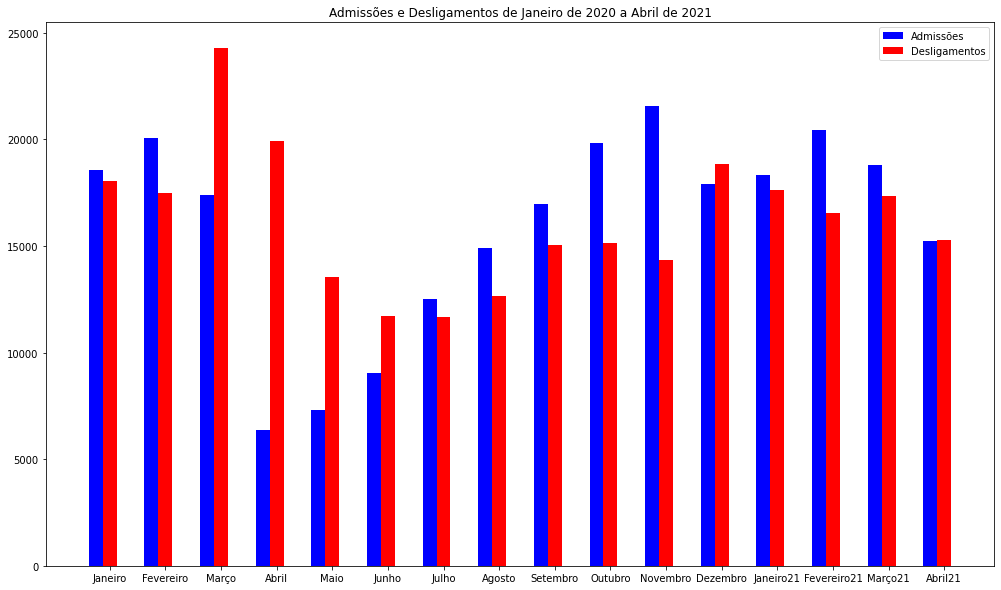

In [261]:
fig, (tx1) = plt.subplots(figsize=(17,10))
meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro','Janeiro21','Fevereiro21','Março21','Abril21']

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(admi))
x2 = [x + 0.25 for x in x1]

# Plota as barras
plt.bar(x1, admi, width=0.25, label = 'Admissões', color = 'blue')
plt.bar(x2, desl, width=0.25, label = 'Desligamentos', color = 'red')

# coloca o nome dos meses como label do eixo x
plt.xticks([x + 0.25 for x in range(len(admi))], meses)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Admissões e Desligamentos de Janeiro de 2020 a Abril de 2021")
plt.show()

In [110]:
admiH=[]
deslH=[]
admiM=[]
deslM=[]
for index in range(len(mesesDF)):
    admiH.append(pesquisaQuant(mesesDF[index],["Admissão","Homem"],["tipomovimentação","sexo"]))
    deslH.append(pesquisaQuant(mesesDF[index],["Desligamento","Homem"],["tipomovimentação","sexo"]))
    admiM.append(pesquisaQuant(mesesDF[index],["Admissão","Mulher"],["tipomovimentação","sexo"]))
    deslM.append(pesquisaQuant(mesesDF[index],["Desligamento","Mulher"],["tipomovimentação","sexo"]))

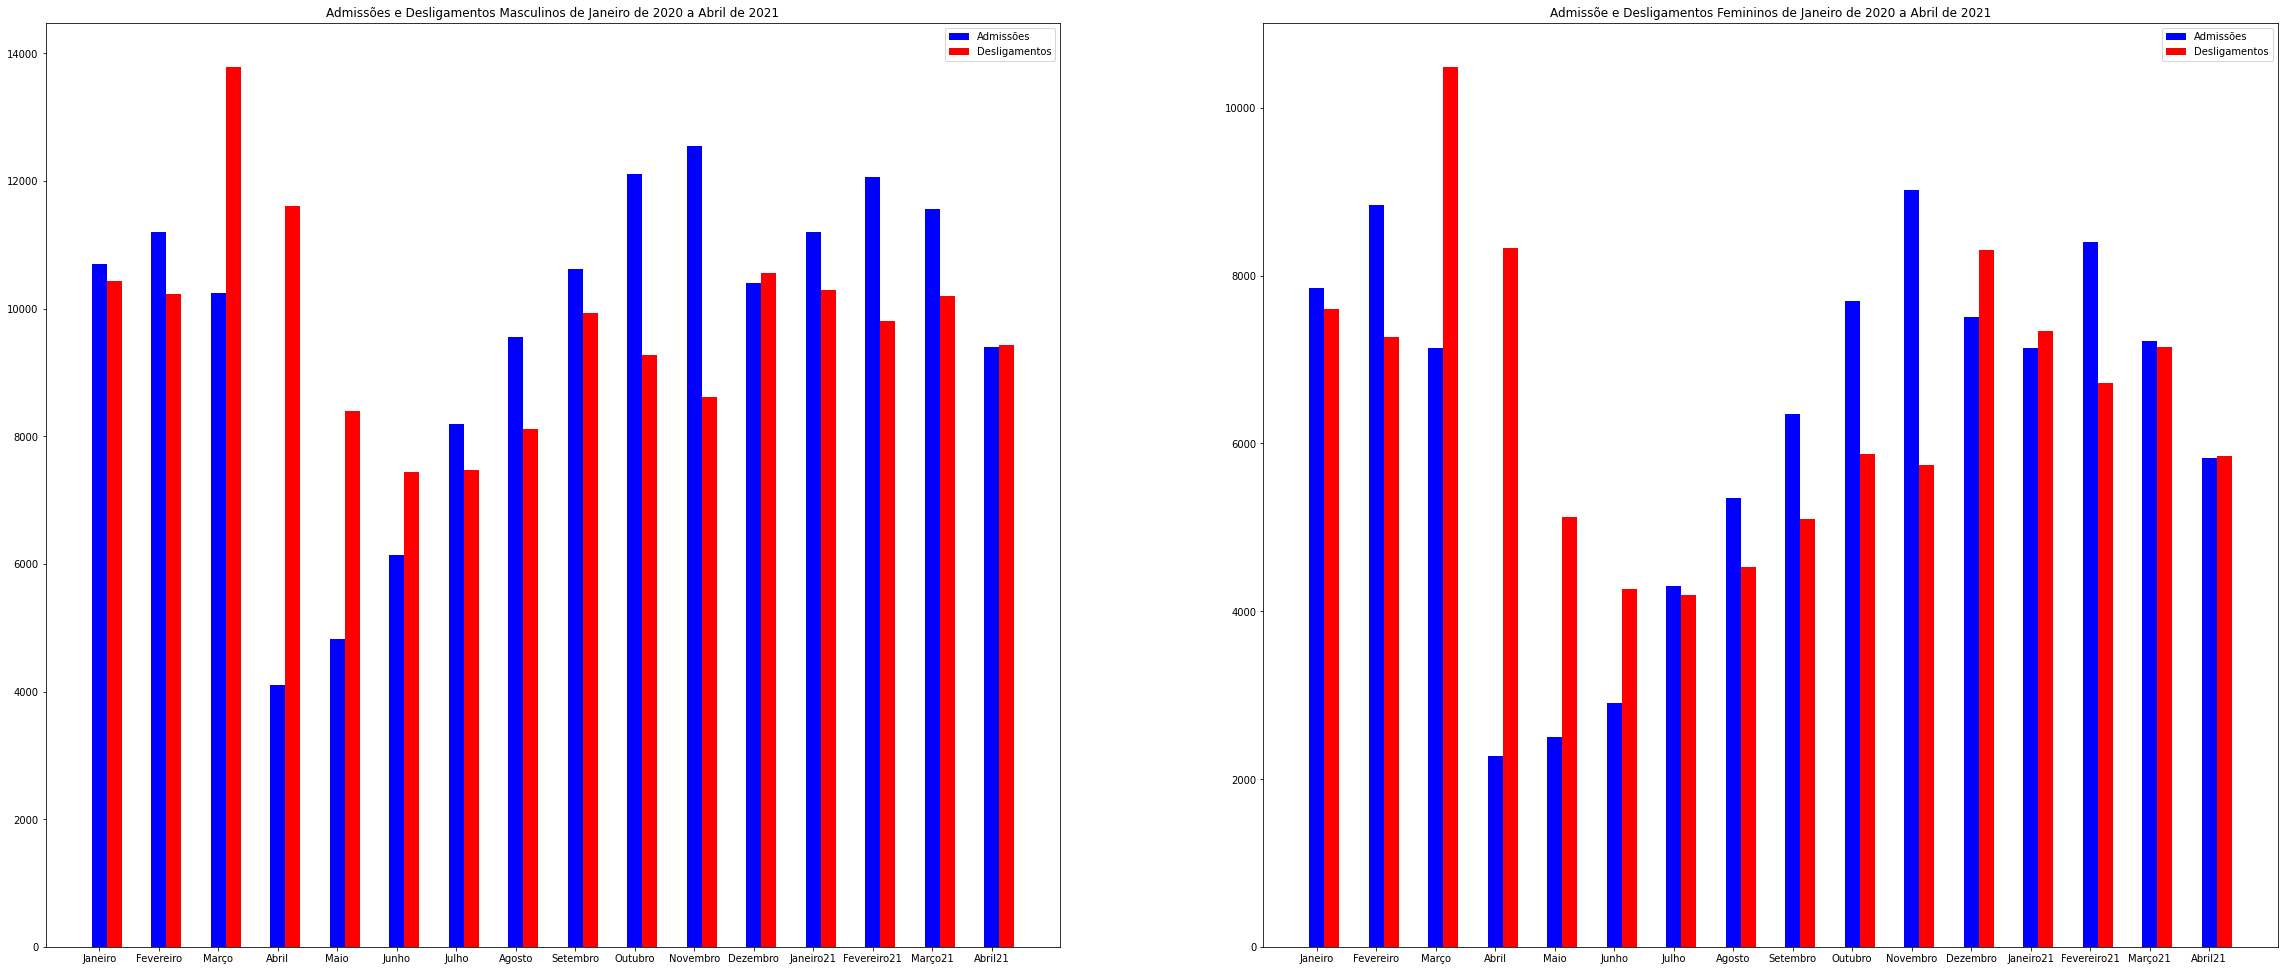

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40,17))

# Cria eixo x para x1 e x2 com uma separação de 0.25 entre as barras
x1H = np.arange(len(admiH))
x2H = [x + 0.25 for x in x1H]
x1M = np.arange(len(admiM))
x2M = [x + 0.25 for x in x1M]

# Plota as barras
ax1.bar(meses, admiH, width=0.25, label = 'Admissões', color = 'blue')
ax1.bar(x2H, deslH, width=0.25, label = 'Desligamentos', color = 'red')

ax2.bar(meses, admiM, width=0.25, label = 'Admissões', color = 'blue')
ax2.bar(x2M, deslM, width=0.25, label = 'Desligamentos', color = 'red')

# inseri uma legenda no gráfico
ax1.legend()
ax2.legend()

ax1.set(title="Admissões e Desligamentos Masculinos de Janeiro de 2020 a Abril de 2021")
ax2.set(title="Admissõe e Desligamentos Femininos de Janeiro de 2020 a Abril de 2021")
plt.show()

Classe A (acima de 20 salários mínimos) A => acima de R$ 22000

Classe B (de 10 a 20 salários mínimos) B => de R$ 11000 a R$ 22000

Classe C (de 4 a 10 salários mínimos) C => de R$ 4400 a R$ 11000

Classe D (de 2 a 4 salários mínimos) D => de R$ 2200 a R$ 4400

Classe E (recebe até 2 salários mínimos) E => de R$ 0 a R$ 2200

In [244]:
classeAadm = []
classeAdem = []
classeBadm = []
classeBdem = []
classeCadm = []
classeCdem = []
classeDadm = [] 
classeDdem = [] 
classeEadm = []
classeEdem = []

for index in range(len(mesesDF)):
    classeAadm.append(pesquisa(mesesDF[index],'salário >= 22000 and tipomovimentação == "Admissão"'))
    classeAdem.append(pesquisa(mesesDF[index],'salário >= 22000 and tipomovimentação == "Desligamento"'))
    classeBadm.append(pesquisa(mesesDF[index],'salário >= 11000 and salário < 22000 and tipomovimentação == "Admissão"'))
    classeBdem.append(pesquisa(mesesDF[index],'salário >= 11000 and salário < 22000 and tipomovimentação == "Desligamento"'))
    classeCadm.append(pesquisa(mesesDF[index],'salário >= 4400 and salário < 11000 and tipomovimentação == "Admissão"'))
    classeCdem.append(pesquisa(mesesDF[index],'salário >= 4400 and salário < 11000 and tipomovimentação == "Desligamento"'))
    classeDadm.append(pesquisa(mesesDF[index],'salário >= 2200 and salário < 4400 and tipomovimentação == "Admissão"'))
    classeDdem.append(pesquisa(mesesDF[index],'salário >= 2200 and salário < 4400 and tipomovimentação == "Desligamento"'))
    classeEadm.append(pesquisa(mesesDF[index],'salário < 2200 and tipomovimentação == "Admissão"'))
    classeEdem.append(pesquisa(mesesDF[index],'salário < 2200 and tipomovimentação == "Desligamento"'))


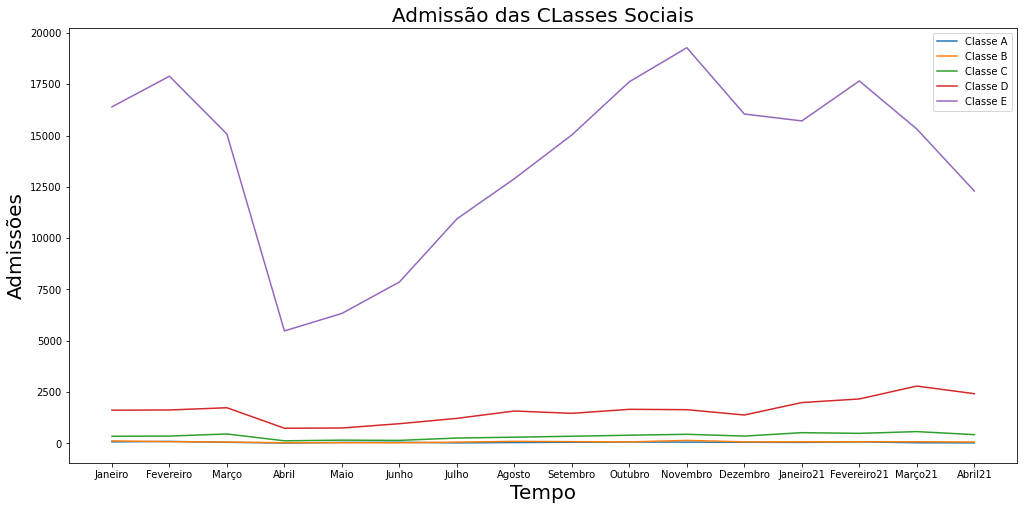

In [283]:
fig, ax = plt.subplots(figsize=(17,8))

x=(meses)
y=(classeAadm)

x2=np.arange(len(meses))
y2=(classeBadm)

x3=np.arange(len(meses))
y3=(classeCadm)

x4=np.arange(len(meses))
y4=(classeDadm)

x5=np.arange(len(meses))
y5=(classeEadm)

plt.plot(x,y,x2,y2,x3,y3,x4,y4,x5,y5)
plt.title("Admissão das CLasses Sociais",fontsize=20)
plt.xlabel("Tempo",fontsize=20)
plt.ylabel("Admissões",fontsize=20)

ax.legend(["Classe A", "Classe B", "Classe C", "Classe D", "Classe E"]);
plt.show()

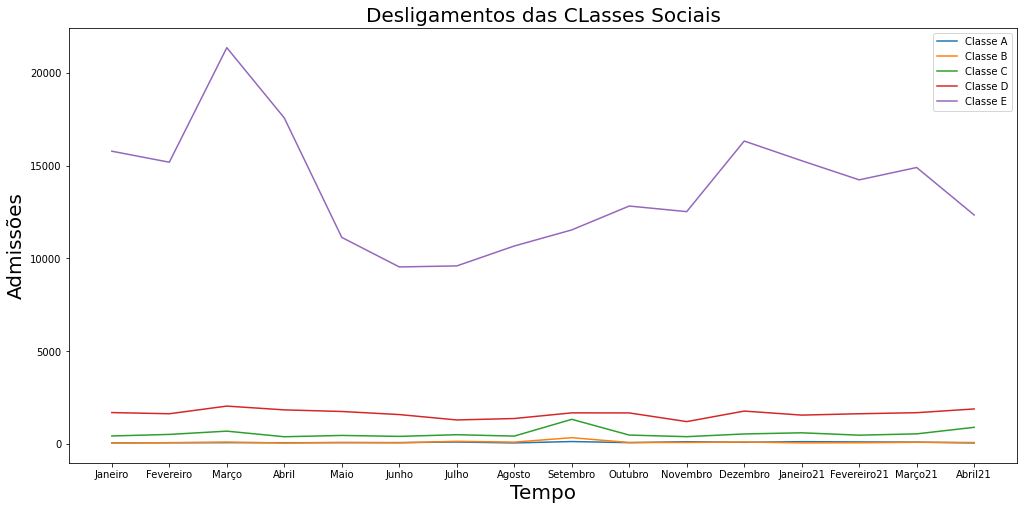

In [278]:
fig, ax = plt.subplots(figsize=(17,8))

x=(meses)
y=(classeAdem)

x2=np.arange(len(meses))
y2=(classeBdem)

x3=np.arange(len(meses))
y3=(classeCdem)

x4=np.arange(len(meses))
y4=(classeDdem)

x5=np.arange(len(meses))
y5=(classeEdem)

plt.plot(x,y,x2,y2,x3,y3,x4,y4,x5,y5)
plt.title("Desligamentos das CLasses Sociais",fontsize=20)
plt.xlabel("Tempo",fontsize=20)
plt.ylabel("Admissões",fontsize=20)

ax.legend(["Classe A", "Classe B", "Classe C", "Classe D", "Classe E"]);
plt.show()

In [279]:
classeAadm = []
classeAdem = []
classeBadm = []
classeBdem = []
classeCadm = []
classeCdem = []
classeDadm = [] 
classeDdem = [] 
classeEadm = []
classeEdem = []

for index in range(len(mesesDF)):
    classeAadm.append(pesquisa(mesesDF[index],'salário >= 22000 and tipomovimentação == "Admissão"'))
    classeAdem.append(pesquisa(mesesDF[index],'salário >= 22000 and tipomovimentação == "Desligamento"'))
    classeBadm.append(pesquisa(mesesDF[index],'salário >= 11000 and salário < 22000 and tipomovimentação == "Admissão"'))
    classeBdem.append(pesquisa(mesesDF[index],'salário >= 11000 and salário < 22000 and tipomovimentação == "Desligamento"'))
    classeCadm.append(pesquisa(mesesDF[index],'salário >= 4400 and salário < 11000 and tipomovimentação == "Admissão"'))
    classeCdem.append(pesquisa(mesesDF[index],'salário >= 4400 and salário < 11000 and tipomovimentação == "Desligamento"'))
    classeDadm.append(pesquisa(mesesDF[index],'salário >= 2200 and salário < 4400 and tipomovimentação == "Admissão"'))
    classeDdem.append(pesquisa(mesesDF[index],'salário >= 2200 and salário < 4400 and tipomovimentação == "Desligamento"'))
    classeEadm.append(pesquisa(mesesDF[index],'salário < 2200 and tipomovimentação == "Admissão"'))
    classeEdem.append(pesquisa(mesesDF[index],'salário < 2200 and tipomovimentação == "Desligamento"'))

,município,seção,graudeinstrução,idade,raçacor,sexo,tipoempregador,tipomovimentação,salário
28,Sp-Sao Jose dos Campos,"Comércio, Reparação de Veículos Automotores e ...",Médio Completo,63.0,Parda,Mulher,CNPJ RAIZ,Desligamento,1720.619995
161,Sp-Jacarei,Atividades Administrativas e Serviços Compleme...,Médio Completo,31.0,Preta,Homem,CNPJ RAIZ,Admissão,2341.800049
230,Sp-Taubate,"Comércio, Reparação de Veículos Automotores e ...",Médio Completo,27.0,Parda,Mulher,CNPJ RAIZ,Desligamento,1423.000000
271,Sp-Taubate,"Agricultura, Pecuária, Produção Florestal, Pes...",6ª a 9ª Fundamental,36.0,Branca,Homem,CNPJ RAIZ,Desligamento,1201.900024
330,Sp-Cacapava,Alojamento e Alimentação,Médio Completo,38.0,Branca,Mulher,CNPJ RAIZ,Desligamento,1436.599976
...,...,...,...,...,...,...,...,...,...
2896686,Sp-Sao Sebastiao,Alojamento e Alimentação,Médio Completo,26.0,Preta,Homem,CNPJ RAIZ,Desligamento,1370.000000
2896706,Sp-Taubate,Construção,Médio Completo,20.0,Branca,Homem,CNPJ RAIZ,Desligamento,1513.920044
2896708,Sp-Jacarei,Atividades Administrativas e Serviços Compleme...,Médio Completo,27.0,Não informada,Mulher,CNPJ RAIZ,Desligamento,1108.380005
2896880,Sp-Jacarei,Atividades Administrativas e Serviços Compleme...,Médio Completo,18.0,Branca,Homem,CNPJ RAIZ,Admissão,1702.800049
